In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
img = cv2.imread("ii.jpg", cv2.IMREAD_GRAYSCALE)

In [5]:
blur = cv2.GaussianBlur(img, (5,5), 0)

In [6]:
laplacian = cv2.Laplacian(blur, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

In [7]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

In [8]:
mask = cv2.subtract(img, blur)
high_boost = cv2.add(img, mask)   # k=1 (can scale mask for stronger effect)


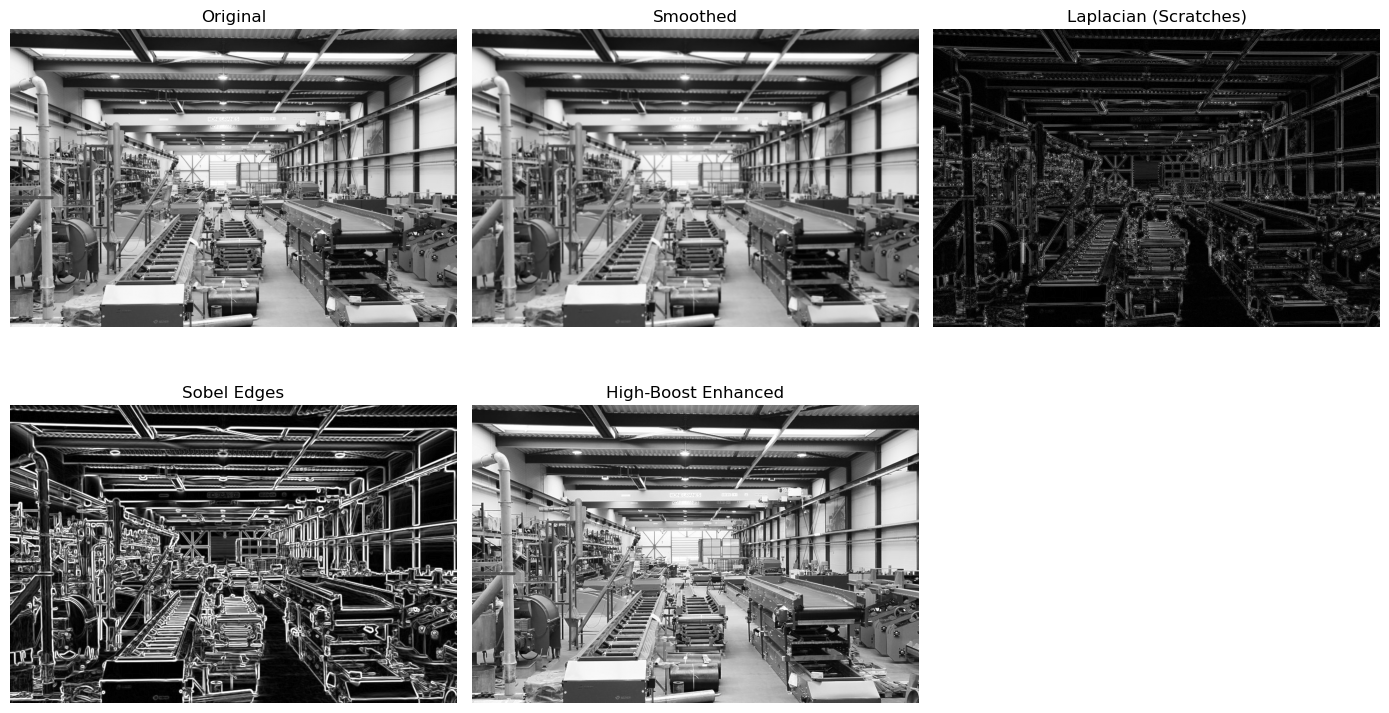

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(2,3,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(2,3,2), plt.imshow(blur, cmap='gray'), plt.title("Smoothed"), plt.axis("off")
plt.subplot(2,3,3), plt.imshow(laplacian, cmap='gray'), plt.title("Laplacian (Scratches)"), plt.axis("off")
plt.subplot(2,3,4), plt.imshow(sobel, cmap='gray'), plt.title("Sobel Edges"), plt.axis("off")
plt.subplot(2,3,5), plt.imshow(high_boost, cmap='gray'), plt.title("High-Boost Enhanced"), plt.axis("off")

plt.tight_layout()
plt.show()